##### 1.Sales prediction is all about forecasting how much of a product customers will buy, considering factors like advertising expenses, target audience segmentation, and choice of advertising platforms.

##### 2.In businesses offering products or services, Data Scientists play a key role in predicting future sales. They use machine learning techniques in Python to analyze and interpret data, helping them make informed decisions about advertising costs. By using these predictions, businesses can optimize their advertising strategies and boost their sales potential.

##### Let's dive into the world of sales prediction with machine learning in Python.

In [46]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#loading data and geting top 6 rows of data(default is 5)
sa = pd.read_csv('Advertising.csv')
sa.head(6)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


In [39]:
#knowing more about data like null values, datatypes hold by the columns
sa.info()
#no null value was found 
#float and int are the datatypes hold in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [40]:
#for statistical information of data
sa.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='Sales', ylabel='Count'>

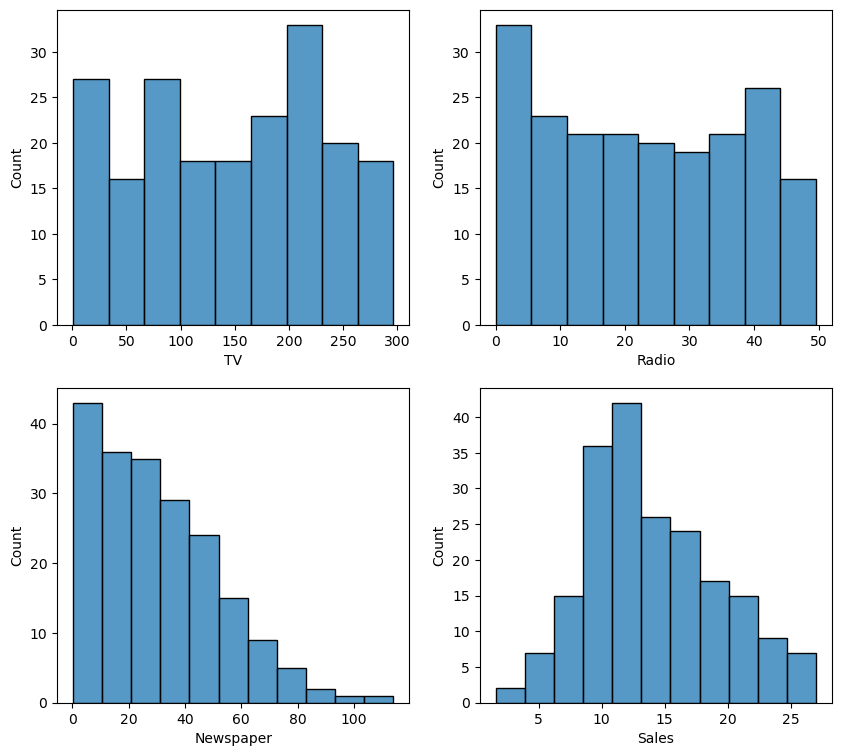

In [14]:
#Distribution of Data
fig, axes = plt.subplots(2,2, figsize = (10,9))
sns.histplot(sa, x = 'TV' , ax = axes[0,0])
sns.histplot(sa, x = 'Radio' , ax = axes[0,1])
sns.histplot(sa, x = 'Newspaper' , ax = axes[1,0])
sns.histplot(sa, x = 'Sales' , ax = axes[1,1])

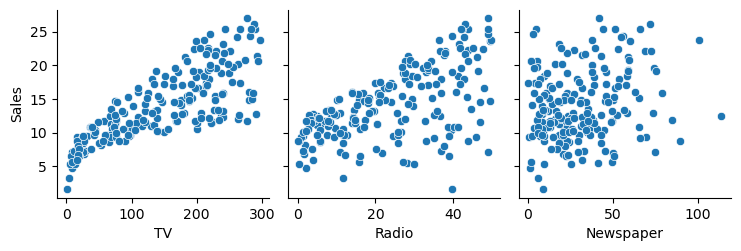

In [16]:
sns.pairplot(data=sa, x_vars=['TV','Radio','Newspaper'], y_vars= 'Sales', kind= 'scatter')
#conclusion:
#The investment towards advertisment has shown the following results:
#TV = Growth in sales by time.
#Radio = Radio seems to little growth compare to TV. 
#Newspaper = Newspaper has result into no growth.

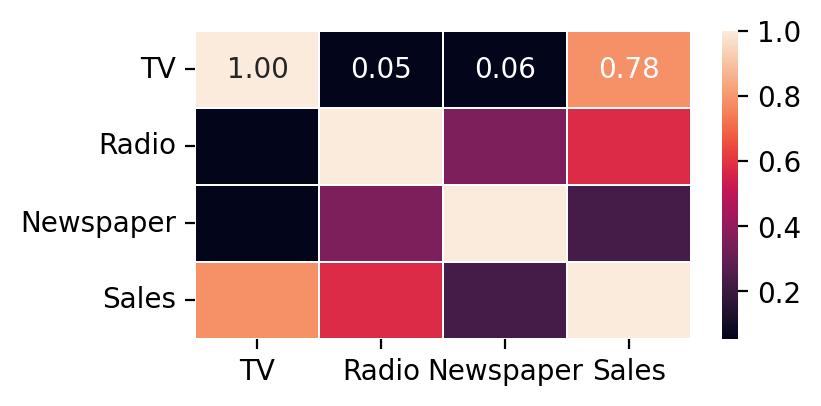

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = sa.corr(method='pearson')

plt.figure(figsize=(4, 2), dpi=200)

sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.6)

plt.show()


In [49]:
#copying data because, original shouldnt be affected
data = sa.copy(deep = True)

In [50]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [51]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['TV','Radio','Newspaper']]
y = data['Sales']


In [53]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [54]:
# importing Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
# we won't use Ridge regression as there is no high correlation between independent variabales,

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 1.054832840507332
The mean squared error is: 1.9289249074665722
The root mean squared error is: 1.3888574107756966
R2 score is: 0.9224605706201435


In [59]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 0.7783333333333337
The mean squared error is: 1.3058333333333338
The root mean squared error is: 1.1427306477614634
R2 score is: 0.9475077691516525


In [60]:

# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.5207999999999985
The mean squared error is: 0.40819156666666423
The root mean squared error is: 0.6388987139341136
R2 score is: 0.9835914083360701


In [61]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 1.528085474175981
The mean squared error is: 4.219983823796101
The root mean squared error is: 2.0542599211872146
R2 score is: 0.8303639833656692


In [62]:
# Lasso Algorithm
las = Lasso()
las.fit(x_train,y_train)
lapred = las.predict(x_test)
lamae = mean_absolute_error(y_test,lapred)
lamse = mean_squared_error(y_test,lapred)
lar2 = r2_score(y_test,lapred)
print(f'The mean absolute score is: {lamae}\nThe mean squared error is: {lamse}\nThe root mean squared error is: {np.sqrt(lamse)}\nR2 score is: {lar2}')

The mean absolute score is: 1.0658572451157082
The mean squared error is: 1.9812231518706365
The root mean squared error is: 1.4075592889362196
R2 score is: 0.9203582720739625


###### "I tried several different algorithms to predict my data. Except for Random Forest Regressor, which had a high R-squared score of 0.98, all the other algorithms performed similarly with an R-squared score around 0.92. This helps me understand which models might work better for my data. Instead of this manual process, I could create a simple function where I can input all models using a loop, making it easier and less tedious."
